# 导入必要的包，定义一些函数

In [5]:
from yolov3_model import *
from matplotlib import pyplot as plt
%matplotlib inline
def plot_info(img,x,y,info):
    cv2.putText(img, info, (x, y), 0, 0.5, [225, 255, 255], thickness=1, lineType=cv2.LINE_AA)
    return img


def fix_outOFrange(det,h,w):
    det = np.where(det<0,0,det)
    det[:, [1,3]] = np.where(det[:, [1,3]] > h - 1, h - 1, det[:, [1,3]])
    det[:, [0,2]] = np.where(det[:, [0,2]] > w - 1, w - 1, det[:, [0,2]])
    return det

# 加载模型

In [3]:

yolo_cfg_path = 'coco_cfg/'
device = torch.device('cuda:0')
cfg = yolo_cfg_path + 'yolov3.cfg'
weights = yolo_cfg_path + 'yolov3.pt'
name_path = yolo_cfg_path + "coco.names"
f = open(name_path)
names = [i.strip() for i in f.readlines()]
labelmap = dict(enumerate(names))
f.close()

yolo_dectection = YOLO_Dectection(device=device, cfg_path=cfg, weights_path=weights)
colors = [[random.randint(0, 255) for _ in range(3)] for _ in range(len(names))]

Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients


# 测试图片

find a  cat  pass!!!
find a  cat  pass!!!


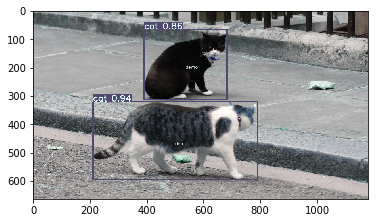

In [7]:

frame = cv2.imread("../img/road.jpg")
det = yolo_dectection.detect(frame)
# print(det)
if det is not None:
    # det = np.where(det < 0, 0, det)
    for *xyxy, conf, cls in det:
        label = '%s %.2f' % (names[int(cls)], conf)
        if names[int(cls)]  in ["cat","dog","person"]:
            print("find a ",names[int(cls)]," pass!!!")
            # plot_one_box(xyxy, depth_colormap, label=label, color=colors[int(cls)])
            plot_one_box(xyxy, frame, label=label, color=colors[int(cls)])
            # print(xyxy)
            midx, midy = int((xyxy[0] + xyxy[2]) / 2), int((xyxy[1] + xyxy[3]) / 2)
            # 获取中心的深度
            info2 = "demo"
            plot_info(frame, midx, midy + 15, info2)
plt.imshow(frame)
plt.show()

In [ ]:
p